#CAMD - Computerøvelser

En "Notebook" er en interaktiv version af programmeringssproget "Python", som er meget brugt - også her i CAMD. Dette er en "Google Colab Notebook", som er en notebook, der kører på en af Google's mange supercomputere.

Her kan man blande forklarende tekst og Python kode. Koden er skrevet i "celler" som denne herunder. Disse kan køres ved at klikke på cellen og trykke "Shift"+"Enter". Alternativt kan du trykke på "play" ikonet der kommer når du har musen over cellen.
 
Prøv det her:

In [ ]:
2+2

4

Det basale regnestykke skulle gerne være løst.

Man kan også ændre i cellerne. Prøv at skriv dit navn i stedet for XXX i cellen herunder og kør den. (Behold '' tegnene)

In [ ]:
navn = 'XXX'
print('Hej ' + navn + '\nNu skal vi løse kvantemekanik!')

Hej XXX
Nu skal vi løse kvantemekanik!


## Installere software
Først skal vi lige installere de programmer som vi skal bruge til at lave de kvantemekaniske ligninger (GPAW) og diverse andre programmer. 

Kør cellen herunder. (Det tager nok omkring et minut, og den skriver en masse, som vi ikke skal bruge til noget)


In [ ]:
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw
!pip -q install ipywidgets
!pip -q install NGLView
!git clone https://gitlab.com/plyngby/Erhvervspraktik22.git
!cd Erhvervspraktik22/introduktion/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cython3 is already the newest version (0.26.1-0.4).
gpaw-data is already the newest version (0.9.20000-1).
libxc-dev is already the newest version (3.0.0-1build1).
python3-mpi4py is already the newest version (2.0.0-3).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0

## Øvelse 1

I den første øvelse vil vi udregne bindingsvinklerne og -afstanden i brintoverilte (H<sub>2</sub>O<sub>2</sub>). Vi starter med at lave molekylet:

In [ ]:
from __future__ import print_function
from ase.visualize import view
from ase.optimize import QuasiNewton
from gpaw import GPAW
from ase.io import Trajectory
import matplotlib.pyplot as plt
from Erhvervspraktik22.introduktion.helpers import find_O2_line, find_central_angle
from numpy.random import normal
from ase.structure import molecule
from google.colab import output
output.enable_custom_widget_manager()

system = molecule('H2O2')
magnitude = 0.1
for atom in system:
    noise = normal(0, magnitude, (3,))
    atom.position += noise
# system = read('h2o2-start.traj')
system.center(vacuum=5)
view(system, viewer='ngl')

Ovenfor kan I se brintoverilte molekylet (Tryk på det og hold inde for at rotere det så I kan se det fra forskellige vinkler)


Det er ikke sikkert at de bindingslængder og vinkler mellem atomerne som vi har valgt er rigtige. Altså om brintoverilte rent faktisk vil se sådan ud i naturen. For at finde ud af det "optimere strukturen" via DFT.

Dette gør vi i næste celle. Prøv at start den. Udregningerne tager et par minutter. Programmet skriver en masse informationer i - hvis I vil bruge dem til at forstå fx. hvor langt en beregning er: Spørg en vejleder.
Når beregningerne er færdige åbner et vindue med brintoverilte-molekylet og I kan måske ikke se forskel fra det første.

In [ ]:
calc = GPAW(h=0.22,
            xc='PBE',
            mode='lcao',
            basis='dzp')

system.set_calculator(calc)

opt = QuasiNewton(system, trajectory='h2o2.traj')

opt.run(fmax=0.05)

atoms = Trajectory('h2o2.traj')
e_n = []
for config in atoms:
    e_n += [config.get_potential_energy()]

O2_line = find_O2_line(atoms[-1])
vector_1 = None
for atom in atoms[-1]:
    if atom.symbol == 'H':
        if vector_1 is None:
            vector_1 = O2_line.find_vector_from_point(atom.position)
        else:
            vector_2 = O2_line.find_vector_from_point(atom.position)
angle = find_central_angle(vector_1, vector_2)
print("Vinklen mellem de to H atomer "
      "i forhold til søjlen af O atomer er {0}".format(angle))
with open('H2O2.txt', 'w') as fd:
    print("Energi for brintoverilte: {0}.".format(e_n[-1]), file=fd)
view(system, viewer='ngl')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.1.0
 |___|_|             

User:   ???@d68907e856d3
Date:   Tue Feb 15 14:57:26 2022
Arch:   x86_64
Pid:    69
Python: 3.7.12
gpaw:   /usr/local/lib/python3.7/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.7/dist-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /usr/local/lib/python3.7/dist-packages/ase (version 3.22.1)
numpy:  /usr/local/lib/python3.7/dist-packages/numpy (version 1.19.5)
scipy:  /usr/local/lib/python3.7/dist-packages/scipy (version 1.4.1)
libxc:  3.0.0
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  basis: dzp
  h: 0.22
  mode: lcao
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

O-setup:
  name: Oxygen
  id: 32ecd46bf208036f09c70b0ec9a88b78
  Z: 8.0
  valence: 6
  core: 2
  charge: 0.0
  file: /usr/share/gpaw-setups/O.PBE.gz
  compensation charges: gauss, rc=0.

In [ ]:
Nu har I fundet den rigtige stuktur af brintoverilte! 

Den endelige struktur er meget tæt på det vi startede med. Lad os se hvordan strukturen har ændret sig i løbet af optimeringen:
Ved at trække i den nederste bjælke oppe i højre hjørne kan I se de forskellige skridt molekylet er gået igennem for at nå til den mest stabile struktur.

Nu har I fundet den rigtige stuktur af brintoverilte! 

Den endelige struktur er meget tæt på det vi startede med. Lad os se hvordan strukturen har ændret sig i løbet af optimeringen:
Ved at trække i den nederste bjælke oppe i højre hjørne kan I se de forskellige skridt molekylet er gået igennem for at nå til den mest stabile struktur. Kan I se forskel?

In [ ]:
view(Trajectory('h2o2.traj'), viewer='ngl')

Når I kører cellen herunder kommer der et billede af hvordan et brintoverilte molekyle faktisk ser
ud. Passer det med jeres beregninger?

In [ ]:
from IPython.display import Image
Image('Erhvervspraktik22/introduktion/brintoverilte_molekyle.jpg')

Til sidst vil vi se hvordan energien af  molekylet har ændret sig i løbet af optimeringen (og derved i løbet af de forskellige strukturer). Dette kan vi se ved at køre cellen herunder:

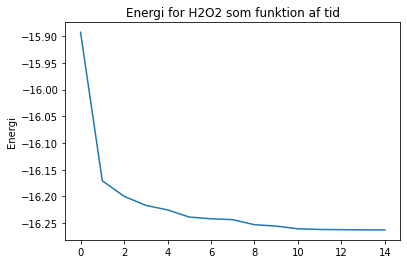

In [ ]:
plt.plot(e_n)
plt.ylabel('Energi')
plt.title('Energi for H2O2 som funktion af tid')
plt.show()

Energien er faldet, hvilket betyder at molekylet er blevet mere stabilt. Materialer og molekyler vil altid helst have så lav energi som muligt. Det samme er sådan set også gældende for alt andet fysik. Det er derfor en bold triller ned ad bakke.

# Øvelse 2: Forbrænding af små molekyler

Når noget bliver forbrændt er det en reaktion med ilt (dioxygen) i luften. Hvis det der brænder består af C, H og O er forbrændingsprodukterne vand og carbondioxid. For eksempel brænder methanol som har formlen CH<sub>3</sub>OH med følgende reaktionsligning:
\begin{equation}
    2 CH_3OH +3 O_2 \rightarrow 2CO_2 + 4 H_2O
\end{equation}
Energien vi kan få ud af denne reaktion er energien efter reaktion minus energien før reaktionen. Altså:
\begin{equation}
    2E(CO_2) + 4 E(H_2O) - ( 2 E(CH_3OH) + 3 E(O_2) )
\end{equation}
hvor $2E(CO_2)$ er 2 gange energien af carbondioxid. 

For at regne på hvor meget energi vi får ud af at brænde methanol skal vi altså kende energien af methanol, dioxygen (ilt), carbondioxid og vand.
Vi kan bruge kvantemekanik og DFT til at regne dette ud.

In [ ]:
from ase import *
from ase.visualize import *
from ase.io import *
from ase.optimize import *
#from gpaw import *
from ase.structure import molecule 
from ase.calculators.emt import EMT

molekyle = 'CH3OH'

mol = molecule(molekyle)

mol.center(vacuum=5)

#calc = GPAW(mode='lcao', basis='dzp', xc='PBE')
calc = EMT()

mol.set_calculator(calc)

E = mol.get_potential_energy()

fil = open(molekyle+'.txt', 'w')

fil.write(str(E))

fil.close()

print(f'Energien af {molekyle} er: {E:0.2f} eV (elektronvolt)')


Energien af H2O er: 2.62 eV (elektronvolt)


Ovenfor står energien af det valgte molekyle. Hvis I vil se molekylet så kør cellen herunder:

In [ ]:
view(mol, viewer='ngl')

Nu har vi udregnet energien af methanol. Hvad er den? Skriv den gerne ned i cellen herunder (kun tallet), så vi kan udregne forbrændingsenergien senere.

In [ ]:
energi_CH3OH = 

Nu har vi udregnet energien af methanol. Hvad er den? Skriv den gerne ned, så vi kan udregne forbrændingsenergien senere.

Så mangler vi bare de tre andre molekyler. Prøv ændre molekyle-navnet til $O_2$ i den forrige celle.

Altså find der hvor der står:

molekyle = 'CH3OH'

og ændre det til:

molekyle = 'O2'

og kør cellen igen.

Hvad er energien af $O_2$?







In [ ]:
energi_O2 = 


Prøv nu på samme måde at regne energien af $CO_2$ og $H_2O$.



In [ ]:
energi_H2O = 
energi_CO2 = 

Nu har vi alle energierne som indgår i reaktionen. Hvad er forbrændingsenergien af hele reaktionen? 



In [ ]:
2* energi_CO2 + 4* energi_H2O - ( 2* energi_CH3OH + 3* energi_O2 )

3.58

Resultatet er angivet i elektronvolt (eV). Hvad er forbrændingsenergien af methanol i kJ/mol (brug Google)?

Hvad er den eksperimentielle værdi af methanols forbrændingsenergi (brug Google)?

Bruger man methanol som brændstof?

Er methanol giftigt?

Er nogle af de ting der bliver lavet i forbrændingen giftige?

Hvad er de kemiske formler for methan og ethanol?

Hvordan ser reaktionsligningen ud for forbrændingen af methan og ethanol?

Prøv nu at regne forbrændingsenergien ud af methan og ethanol og sammenlign den med de eksperimentielle data I kan finde med Google. Husk at I kan genbruge energierne af vand, carbondioxid og dioxygen.

Hvilket brændstof er bedst?

Hvilket er mindst farligt?

In [ ]:
e_n

In [ ]:
from __future__ import print_function
from ase.visualize import view
from ase.optimize import QuasiNewton
from gpaw import GPAW
from ase.io import Trajectory
import matplotlib.pyplot as plt
from helpers import find_O2_line, find_central_angle
from numpy.random import normal
from ase.structure import molecule

system = molecule('H2O2')
magnitude = 0.1
for atom in system:
    noise = normal(0, magnitude, (3,))
    atom.position += noise
# system = read('h2o2-start.traj')
system.center(vacuum=5)
view(system)

calc = GPAW(h=0.22,
            xc='PBE',
            mode='lcao',
            basis='dzp')

system.set_calculator(calc)

opt = QuasiNewton(system, trajectory='h2o2.traj')

opt.run(fmax=0.05)

atoms = Trajectory('h2o2.traj')
e_n = []
for config in atoms:
    e_n += [config.get_potential_energy()]

O2_line = find_O2_line(atoms[-1])
vector_1 = None
for atom in atoms[-1]:
    if atom.symbol == 'H':
        if vector_1 is None:
            vector_1 = O2_line.find_vector_from_point(atom.position)
        else:
            vector_2 = O2_line.find_vector_from_point(atom.position)
angle = find_central_angle(vector_1, vector_2)
print("Vinklen mellem de to H atomer "
      "i forhold til søjlen af O atomer er {0}".format(angle))
with open('H2O2.txt', 'w') as fd:
    print("Energi for brintoverilte: {0}.".format(e_n[-1]), file=fd)
view(system, viewer='x3d')

plt.plot(e_n)
plt.ylabel('Energi')
plt.title('Energi for H2O2 som funktion af tid')
plt.show()

In [ ]:
!pip install NGLView

In [ ]:
!pip install ipywidgets

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
view(Trajectory('h2o2.traj'), viewer='ngl')


In [ ]:
!ase gui -h

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()